In [1]:
import numpy as np

In [2]:
vals = [1, 2, 3, 4]
weights = [3, 3, 2, 1]
np.average(a=vals, weights=weights)

2.111111111111111

In [3]:
np.min(vals)

1

In [4]:
from rule import Rule
from antecedent import Antecedent
from engine import FuzzyEngine

In [5]:
vals = np.arange(0, 10.1, 1)
service = Antecedent(vals, 'service')
food = Antecedent(vals, 'food')

In [23]:
food.set_mf('low', 'trapmf', [0, 0, 2, 4])
food.set_mf('medium', 'trapmf', [2, 4, 6, 8])
food.set_mf('high', 'trapmf', [6, 8, 10, 10])

service.set_mf('low', 'trapmf', [0, 0, 1, 3])
service.set_mf('medium', 'trapmf', [1, 3, 5, 8])
service.set_mf('high', 'trapmf', [5, 8, 10, 10])

In [6]:
food.auto_trimf()
service.auto_trimf()

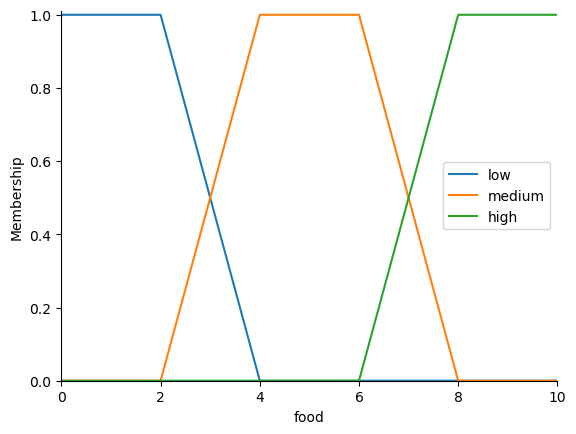

In [24]:
food.view()

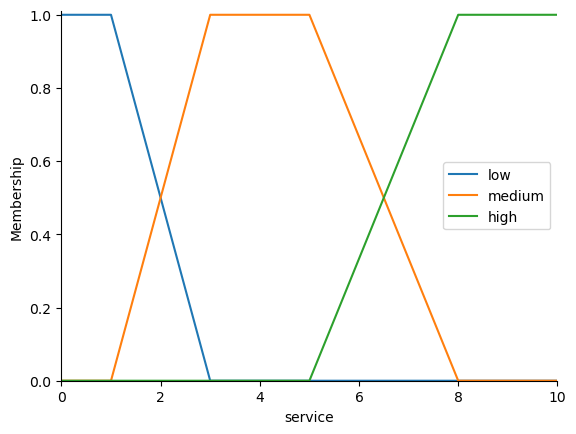

In [25]:
service.view()

In [26]:
eng = FuzzyEngine(rules=[
    Rule(antecedents=[food['low'], service['low']], operations=['or'], consequent=0),
    Rule(antecedents=[food['medium'], service['medium']], operations=['or'], consequent=7),
    Rule(antecedents=[food['high'], service['high']], operations=['or'], consequent=10),
    Rule(antecedents=[food['high'], service['high']], operations=['and'], consequent=15),
])

In [27]:
eng['service'] = 5
eng['food'] = 5
eng.compute()

7.0

In [28]:
eng['service'] = 10
eng['food'] = 5
eng.compute()

8.5

In [29]:
eng['service'] = 5
eng['food'] = 0
eng.compute()

3.5

In [30]:
eng['service'] = 10
eng['food'] = 0
eng.compute()

5.0

In [31]:
eng['service'] = 10
eng['food'] = 10
eng.compute()

12.5

In [32]:
eng['service'] = 0
eng['food'] = 0
eng.compute()

0.0